## Gradient Descent Assignment
In this assignment, you will implement and experiment with Gradient Descent on a simulated dataset. Your task is to complete the missing sections of the code, understand the role of each part of the algorithm, and tweak the hyperparameters to see their effect.

## Objectives:
Understand and implement the Gradient Descent algorithm.
Visualize how the cost function decreases with iterations.
Tweak learning rates and number of iterations to observe the impact.

## Instructions:
- Complete the code where indicated.
- Run each cell to observe the results.
- Use assert statements to validate your code.



### Part 1: Setting up the Dataset
In this section, we'll import necessary libraries and load the dataset.

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Simulated real-world dataset with multiple features:
X = np.array([
    [750, 3, 30, 15],
    [850, 3, 25, 12],
    [900, 4, 20, 10],
    [1200, 4, 18, 8],
    [1500, 5, 10, 5],
    [2000, 5, 5, 3],
    [2300, 6, 3, 2],
    [3000, 6, 2, 1],
    [3500, 7, 1, 1],
    [4000, 8, 1, 0]
])  # Features: [Size, Bedrooms, Age, Distance to City Center]

y = np.array([150, 175, 200, 300, 375, 480, 525, 650, 720, 800]) 
print(y) # Price of the house in 1000s of dollars

In [11]:
X.shape,y.shape

((10, 4), (10,))

In this section, we’ll import necessary libraries and load the dataset.

$$ X_{norm} = \frac{X - \mu}{\sigma} $$
 
where mu is the mean and sigma is the standard deviation of the features.

In [6]:
# Normalize features for better convergence
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
# Add a column of ones to X_norm to account for theta0 (intercept)
X_b = np.c_[np.ones(X_norm.shape[0]), X_norm]  # Add intercept term


array([[ 1.        , -1.12594337, -1.33082093,  1.79139476,  1.86710854],
       [ 1.        , -1.0358679 , -1.33082093,  1.30723401,  1.26481547],
       [ 1.        , -0.99083017, -0.69709668,  0.82307327,  0.86328675],
       [ 1.        , -0.72060376, -0.69709668,  0.62940897,  0.46175803],
       [ 1.        , -0.45037735, -0.06337243, -0.14524822, -0.14053505],
       [ 1.        ,  0.        , -0.06337243, -0.62940897, -0.54206377],
       [ 1.        ,  0.27022641,  0.57035183, -0.82307327, -0.74282813],
       [ 1.        ,  0.9007547 ,  0.57035183, -0.91990542, -0.94359249],
       [ 1.        ,  1.35113205,  1.20407608, -1.01673756, -0.94359249],
       [ 1.        ,  1.8015094 ,  1.83780033, -1.01673756, -1.14435685]])

### Part 2: Gradient Descent Algorithm
Now, we will implement the Gradient Descent algorithm.

### Useful Equations

$$ Y_{prediction} = f(X) = W.X $$

$$ J (Cost Function) = \frac{1}{2m}  (Y_{prediction}  - Y)^2 $$

$$ \begin{align}
Gradient &(\frac{\partial J(W)}{\partial W}) = \frac{1}{m}  (Y_{prediction} - Y).X\\
\end{align} $$

$$ \begin{align*} 
  W &= W -  \alpha .(\frac{\partial J(W)}{\partial W}) 
  \end{align*} $$

Complete the missing parts of the code below:

In [25]:
# Initialize parameters (weights vector) with zeros
theta = np.zeros(X_b.shape[1])

# Define learning rate and number of iterations
alpha = 0.01  # You can experiment with this
iterations = 1000  # Try changing this value

# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)  # Number of training examples
    cost_history = []  # To store the cost at each iteration

    for i in range(iterations):
        # Predicted values 
        y_pred = X.dot(theta)
        print("Y_Pred: ",y_pred)
        # Compute the error (difference between predicted and actual values)
        error = y-y_pred
        print("Error: ",error)

        # Compute gradients 
        gradients = 1/m * (X.T.dot(y_pred-y))
        print("Gradients: ",gradients)

        # Update the parameters (theta)
        theta = theta-(alpha*gradients)
        print("Theta: ",theta)

        # Compute the cost function (Mean Squared Error) and append to history
        cost = 1/2*m * sum((error)**2)
        print("Cost: ",cost )
        cost_history.append(cost)

    return theta, cost_history

(10, 5)

In [26]:

# Running the gradient descent function
theta, cost_history = gradient_descent(X_b, y, theta, alpha, iterations)

# Assert statement to check theta shape
assert theta.shape == (X_b.shape[1],), "Theta shape mismatch!"


Y_Pred:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error:  [150. 175. 200. 300. 375. 480. 525. 650. 720. 800.]
Gradients:  [-437.5        -220.7974954  -217.20898687  208.11649616  209.84894689]
Theta:  [ 4.375       2.20797495  2.17208987 -2.08116496 -2.09848947]
Cost:  12053375.0
Y_Pred:  [-8.64801303 -6.17760459 -2.85143421 -1.00912993  3.84012433  6.6847684
  9.48227682 11.49729306 14.06974466 16.86197449]
Error:  [158.64801303 181.17760459 202.85143421 301.00912993 371.15987567
 473.3152316  515.51772318 638.50270694 705.93025534 783.13802551]
Gradients:  [-433.125      -212.77099432 -209.04397069  200.0019591   201.69736553]
Theta:  [ 8.70625     4.3356849   4.26252958 -4.08118455 -4.11546312]
Cost:  11683118.004820976
Y_Pred:  [-16.8431782  -11.99797504  -5.47301126  -1.85853832   7.65458052
  13.23570078  18.72520377  22.68040393  27.72955644  33.20975739]
Error:  [166.8431782  186.99797504 205.47301126 301.85853832 367.34541948
 466.76429922 506.27479623 627.31959607 692.27044356 766.79

### Part 3: Visualizing the Cost Function
Let's plot the cost function to observe how it decreases over time.

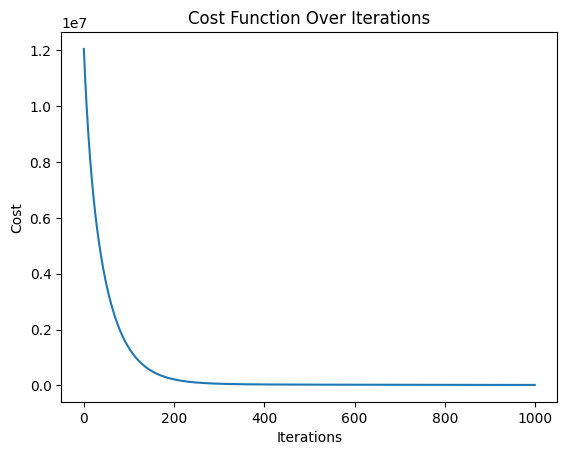

In [27]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

# Assert to check the final cost decreases
assert cost_history[-1] < cost_history[0], "Cost did not decrease!"


### Part 4: Predictions and Visualization
Now, we'll use the final parameters to make predictions

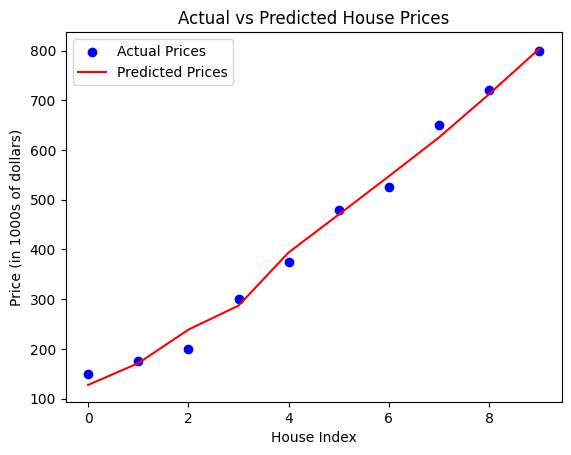

In [28]:
# Predicted prices using the final parameters
y_pred_final = X_b.dot(theta)

# Plotting actual vs predicted prices
plt.scatter(range(len(y)), y, color='blue', label='Actual Prices')
plt.plot(range(len(y)), y_pred_final, color='red', label='Predicted Prices')
plt.xlabel('House Index')
plt.ylabel('Price (in 1000s of dollars)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

# Assert to check predictions length
assert len(y_pred_final) == len(y), "Prediction length mismatch!"

### Part 6: Implementing Gradient Descent on Real-World Data (Ames Housing Dataset)
In this section, you will apply the Gradient Descent algorithm to a real dataset from the Ames Housing dataset. Download the dataset from Kaggle and follow the steps below.

## Instructions:
Load the dataset and manually preprocess the data without using any third-party libraries like sklearn.
Implement the Gradient Descent algorithm as you did for the simulated data.
Visualize the cost function and make predictions.
Experiment with hyperparameters and observe their effects.

## Loading and Preprocessing the Dataset (Manual Processing)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
# Assuming the dataset is downloaded and named 'train.csv'
df = pd.read_csv('train.csv')

# Select a few features (you can try different sets of features)

## Select Features by your own choice
features = []
target = 'SalePrice'

# Extracting features and target
X_real = df[features].values
y_real = df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Normalize features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Add a column of ones for the intercept term
X_train_b = ___________


## Implementing Gradient Descent for Real-World Data

In [ ]:
# Initialize parameters (weights vector) with zeros
theta_real = np.zeros(X_train_b.shape[1])

# Define learning rate and number of iterations (You can experiment with these values)
alpha_real = 0.01
iterations_real = 1000

## Incase of having NaN values in the dataset, replace them with 0
X_train_b = np.nan_to_num(X_train_b)  # Replace NaNs with 0

# Use the gradient_descent function you implemented earlier
theta_real, cost_history_real = gradient_descent( ___________ )

# Assert statement to check theta shape
assert theta_real.shape == (X_train_b.shape[1],), "Theta shape mismatch for real dataset!"


## Visualizing the Cost Function for Real Data

In [ ]:
# Plotting the cost function over iterations for real data
plt.plot(range(iterations_real), cost_history_real)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations (Real Data)')
plt.show()

# Assert to check cost reduction
assert cost_history_real[-1] < cost_history_real[0], "Cost did not decrease for real data!"


## Making Predictions on Real Data
Once the model has been trained, we can now make predictions on the test set.

In [ ]:
# Normalize the test data
X_test_scaled = scaler.transform(X_test)

# Add intercept term for the test data
X_test_b = ___________

# Predicted prices using the final parameters for real data
y_pred_real = ___________


# Plotting actual vs predicted prices
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.plot(range(len(y_test)), y_pred_real, color='red', label='Predicted Prices')
plt.xlabel('House Index')
plt.ylabel('Price (in dollars)')
plt.title('Actual vs Predicted House Prices (Real Data)')
plt.legend()
plt.show()

# Assert to check predictions length
assert len(y_pred_real) == len(y_test), "Prediction length mismatch for real data!"


## Part 7: Experimenting with Hyperparameters for Real Data
You can now experiment with different learning rates and iterations to observe their effects on the model.

### Tasks:

Run the Gradient Descent with alpha=0.001, alpha=0.1, and alpha=0.05. Record the final cost and observe the impact of the learning rate.
Try using different sets of features from the dataset. For example, you can add more features or remove certain features and see how the model's performance changes.

### Final Note on Gradient Descent
Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning by iteratively adjusting model parameters. The algorithm calculates the gradient (slope) of the cost function and updates the parameters in the direction that reduces the error.

- Learning Rate (α) controls the size of steps taken towards the minimum.
- Iterations determine how many times the parameters are updated.
- Convergence is reached when changes in the cost become negligible.

Gradient Descent has variants like Batch, Stochastic, and Mini-Batch, each balancing between computation time and convergence stability. It is widely used in linear regression, neural networks, and more, making it essential for optimizing machine learning models.